# Total Raffles Prediction

A few days ago, at school I received the raffle results, and I wondered how many raffles did the school make, and as I'm always curious about where you can apply statistics/data science stuff, I remembered the german tank problem, where Allies tried to estimate the total number of tanks by using the serial numbers of the parts of tanks they've destroyed, so I thought why not give it a try and estimate the "population" or total number of raffles that the school did, based on the "serial numbers" of the 20 winners. I pasted the image below this so you can see the relevant info (winners info is hidden because is not the scope of this exercise)

PS: Rifa = raffle

<!--
![raf_raw](images/raffle_c318237d-10dc-4731-bcb4-2bb05884f234.jpg)
-->
<img src="images/raffle_c318237d-10dc-4731-bcb4-2bb05884f234.jpg" alt="raf_raw" width=500>

As you can see, there is a total number of 20 winners, each one with a raffle N°, let's get to work and estimate the total number of raffles done by the school.

In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

After importing the needed libraries, I created a list with the raffle numbers

In [4]:
raf_list = [38, 334, 145, 322, 752, 123, 596, 629, 635, 753, 596, 731, 13, 732, 252, 382, 674, 181, 477, 846]
len(raf_list) #just to make sure i copied them all

20

Now, having the list, the estimation is pretty straightforward as you can estimate it by mean or by variance, being the first one formula as it follows:

 $$
   \mu = \frac{a + b}{2}
   $$
   Where:  
- \(mu \) = mean of the population  
- \( a \) = first raffle serial number (we assume it is 1)  
- \( b \) = estimate of the higher raffle value  
 
 And for the variance, the formula is this one:

 $$
\sigma^2 = \frac{(b - a)^2}{12}
$$
   Where:  
- \(sigma^2 \) = variance of the population  
- \( a \) = first raffle serial number (we assume it is 1)  
- \( b \) = estimate of the higher raffle value  

### Estimating by mean:

We need to rearrange the formula letting *b* be the unknown
   $$
   b = 2 \cdot \mu - a
   $$

In [5]:
raf_mean = np.mean(raf_list)
b_estimation_mean = 2*raf_mean-1
print("The total number of raffles, by mean is {}".format(b_estimation_mean))

The total number of raffles, by mean is 920.1


### Estimating by variance:

Again, we need to rearrange the formulam, isolating *b* (maybe this one is a little tricky to do mentally, I used pen and paper to solve for *b*)

The formula is as follows:

$$
b = \sqrt{12 \cdot \sigma^2} + a
$$



In [6]:
raf_var = np.var(raf_list)
b_estimation_var = round(np.sqrt(12*raf_var)+1,1)
print("The total number of raffles, estimated by variance is {}".format(b_estimation_var))

The total number of raffles, estimated by variance is 905.2


So now, we have 920 and 905 as the estimations, but as we have 20 elements to play with, we can make iterations taking random samples of the list, to see where does those iterations converge to.

In [7]:
#we'll set the iterations and items taken per iteration as a variables, so we can tweak it
iterations = 500
items_taken = 5


#empty lists for our results
mean_estimations = []
var_estimations = []

#let's attack the problem by pieces
#this lines will be commented after all works
# #first, we need to get items_taken from the raf_list for the estimation

# sample = np.random.choice(raf_list, size=items_taken, replace=True) 
# #This function will get "items_taken" number of numbers and will return them to the list for the next iteration

# #now, as we picked the items, we need to get the mean and variance for each sample
# sample_mean = np.mean(sample)
# sample_variance = np.var(sample)

# #all good, now get the estimations by mean and variance
# esm = 2*sample_mean-1 #esm stands for estimations by sample mean
# esv =  round(np.sqrt(12*sample_variance)+1,1) ##esv stands for estimations by sample variance

# #and now append them to the corresponding list
# mean_estimations.append(esm)
# var_estimations.append(esv)

# #all good to go, now we wrap it into a for loop

for iteration in range(iterations):
    sample = np.random.choice(raf_list, size=items_taken, replace=True)
    sample_mean = np.mean(sample)
    sample_variance = np.var(sample, ddof=1) #Delta Degrees of freedom is set to 1 to correct the divisor, 
                                             #being N-1 as we work with a sample, not the toal population
                                             #Known as the Bessel's correction (I learned it while doing this)
    esm = 2*sample_mean-1 #esm stands for estimations by sample mean
    esv =  round(np.sqrt(12*sample_variance)+1,1) ##esv stands for estimations by sample variance
    mean_estimations.append(esm)
    var_estimations.append(esv)

In [8]:
var_estimations[0:15]

[np.float64(1077.2),
 np.float64(1227.7),
 np.float64(973.3),
 np.float64(616.6),
 np.float64(594.9),
 np.float64(929.2),
 np.float64(1111.4),
 np.float64(610.4),
 np.float64(1030.3),
 np.float64(821.1),
 np.float64(903.8),
 np.float64(528.6),
 np.float64(714.9),
 np.float64(950.1),
 np.float64(1050.3)]

<img src="images/Fr_TBNWWwAcuaos.jpg" alt="IS WORKING!" width=500>

In [8]:
#Lets create a DF with our results
summary = pd.DataFrame({'Mean Estimations':mean_estimations,'Variance Estimations':var_estimations})

In [9]:
summary.tail()

,Mean Estimations,Variance Estimations
495,961.4,1029.4
496,1259.4,615.1
497,1136.2,498.1
498,965.8,808.5
499,1217.4,669.2


In [10]:
summary.describe()

,Mean Estimations,Variance Estimations
count,500.000000,500.000000
mean,941.105600,852.670800
std,234.759395,242.029877
min,261.400000,101.100000
25%,778.900000,733.025000
50%,962.000000,882.600000
75%,1110.000000,1014.425000
max,1493.000000,1405.100000


omg this is beautiful, if you are reading this, I hope you share my joy of having something that works.

Now we just have to plot everything to see where they converge

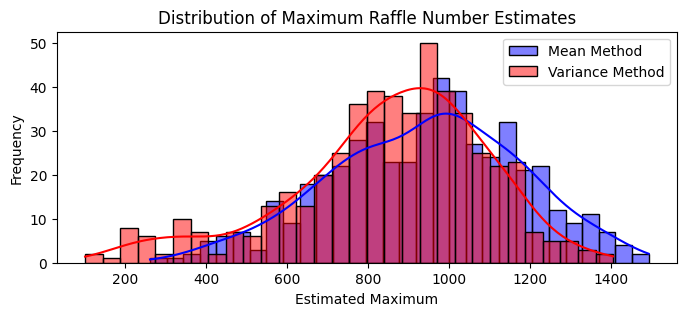

In [12]:
plt.figure(figsize=(8, 3)) #create the plot object
sns.histplot(summary["Mean Estimations"], color="b", label="Mean Method", kde=True, alpha=0.5, bins=30)
sns.histplot(summary["Variance Estimations"], color="r", label="Variance Method", kde=True, alpha=0.5, bins=30)

plt.title("Distribution of Maximum Raffle Number Estimates")
plt.xlabel("Estimated Maximum")
plt.ylabel("Frequency")
plt.legend()

So finally, I can say that with the parameters given, the **total number of raffles given by the school is between 852 and 941** 

Now, i can go to sleep in peace as i got my answer, but first I'll make myself a well deserved coffee

Felipe Gallegos